# Setting up

In [ ]:
!git clone https://github.com/HSE-LAMBDA/IDAO-2022.git

Cloning into 'IDAO-2022'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 2), reused 19 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import os

os.rename('IDAO-2022', 'IDAO_2022')

In [ ]:
!tar xvzf 'IDAO_2022/data/dichalcogenides_public.tar.gz'
!tar xvzf 'IDAO_2022/data/dichalcogenides_private.tar.gz'

Streaming output truncated to the last 5000 lines.
dichalcogenides_public/structures/6141fc3a4e27a1844a5f04de.json
dichalcogenides_public/structures/6141d97dbaaf234b35290390.json
dichalcogenides_public/structures/6141fec7baaf234b35290568.json
dichalcogenides_public/structures/614207a231cf3ef3d4a9f24e.json
dichalcogenides_public/structures/6141d75431cf3ef3d4a9ef52.json
dichalcogenides_public/structures/6141cf24ee0a3fd43fb479f7.json
dichalcogenides_public/structures/6142afd43ac25c70a5c6cc31.json
dichalcogenides_public/structures/6141d0e9baaf234b35290264.json
dichalcogenides_public/structures/614257acee0a3fd43fb47f39.json
dichalcogenides_public/structures/6141da52baaf234b352903a6.json
dichalcogenides_public/structures/6141cf204e27a1844a5f0010.json
dichalcogenides_public/structures/6146d0b54e27a1844a5f0b02.json
dichalcogenides_public/structures/6141cf3bee0a3fd43fb47a11.json
dichalcogenides_public/structures/61423c534e27a1844a5f06ee.json
dichalcogenides_public/structures/6141d36fee0a3fd43fb

In [ ]:
import pandas as pd

targets = pd.read_csv('/content/dichalcogenides_public/targets.csv')
targets

,_id,band_gap
0,6141cf0f51c1cbd9654b8870,1.0843
1,6141cf1051c1cbd9654b8872,1.1102
2,6141cf11cc0e69a0cf28ab35,1.1484
3,6141cf11b842c2e72e2f2d48,1.8068
4,6141cf11ae4fb853db2e3f14,0.3600
...,...,...
2961,6146d0b54e27a1844a5f0b02,1.1461
2962,6146dd853ac25c70a5c6cdeb,0.3550
2963,6146e9103ac25c70a5c6cded,0.3491
2964,6146ecdb3ac25c70a5c6cdef,0.3506


In [ ]:
!unzip test_embeddings.zip
!unzip train_embeddings.zip

Archive:  test_embeddings.zip
   creating: content/64_learn_test_embeddings/
   creating: content/64_learn_test_embeddings/batch_000000/
  inflating: content/64_learn_test_embeddings/batch_000000/target.npy  
  inflating: content/64_learn_test_embeddings/batch_000000/embedding.npy  
  inflating: content/64_learn_test_embeddings/batch_000000/ids.npy  
   creating: content/64_learn_test_embeddings/batch_000003/
  inflating: content/64_learn_test_embeddings/batch_000003/target.npy  
  inflating: content/64_learn_test_embeddings/batch_000003/embedding.npy  
  inflating: content/64_learn_test_embeddings/batch_000003/ids.npy  
   creating: content/64_learn_test_embeddings/batch_000006/
  inflating: content/64_learn_test_embeddings/batch_000006/target.npy  
  inflating: content/64_learn_test_embeddings/batch_000006/embedding.npy  
  inflating: content/64_learn_test_embeddings/batch_000006/ids.npy  
   creating: content/64_learn_test_embeddings/batch_000011/
  inflating: content/64_learn_test_

In [ ]:
import numpy as np

def load_data(path):
    embd, ids, target = sorted(os.listdir(path))
    embeddings = np.load(path + '/' + embd)
    ids = np.load(path + '/' + ids)
    targets = np.load(path + '/' + target)
    return embeddings, ids, targets

train_path = '/content/content/64_learn_train_embeddings'
X_train = np.array([])
y_train = np.array([])
ids_train = np.array([])
for batch in sorted(os.listdir(train_path)):
    embeddings, ids, targets = load_data(train_path + '/' + batch)
    targets = targets.reshape(targets.shape[0])
    X_train = np.vstack([embeddings, X_train]) if X_train.size else embeddings
    y_train = np.concatenate((targets, y_train))
    ids_train = np.concatenate((ids, ids_train))

print(X_train.shape)
print(y_train.shape)
print(ids_train.shape)

(2966, 64)
(2966,)
(2966,)


In [ ]:
test_path = '/content/content/64_learn_test_embeddings'
X_test = np.array([])
ids_test = np.array([])
for batch in sorted(os.listdir(test_path)):
    embeddings, ids, targets = load_data(test_path + '/' + batch)
    X_test = np.vstack([embeddings, X_test]) if X_test.size else embeddings
    ids_test = np.concatenate((ids, ids_test))

print(X_test.shape)
print(ids_test.shape)

(2967, 64)
(2967,)


In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install lightgbm

     |████████████████████████████████| 76.1 MB 1.2 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
s = MinMaxScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
test_data = pd.DataFrame({'id':ids_test})

In [ ]:
test_data

,id
0,6141e49b4e27a1844a5f0364
1,6141e7484e27a1844a5f039e
2,6141f3dc9cbada84a8676b89
3,6141f9c731cf3ef3d4a9f1b8
4,6141d36e4e27a1844a5f017a
...,...
2962,6141d88031cf3ef3d4a9ef76
2963,6141d0a3ee0a3fd43fb47ab1
2964,6141ddfb4e27a1844a5f02d0
2965,6143d24431cf3ef3d4a9f7a4


In [ ]:
threshold = 0.02

def error(output, target, criterion):
    loss = criterion(output, target)
    correct = (np.abs(output-target) < (np.ones_like(output)*threshold)).sum()

    return correct / len(output), loss


def use_model(model, criterion, X_tr, y_tr, kf, X_t, frame, name):
    kf.get_n_splits(X_tr)
    train_losses, train_acc, val_losses, val_acc = [], [], [], []
    for i, (train_index, val_index) in enumerate(kf.split(X_tr)):
        Xtrain, Xval = X_tr[train_index], X_tr[val_index]
        ytrain, yval = y_tr[train_index], y_tr[val_index]

        model.fit(Xtrain, ytrain)

        train_pred = model.predict(Xtrain)
        val_pred = model.predict(Xval)

        t_acc, t_loss = error(train_pred, ytrain, criterion)
        train_losses.append(t_loss)
        train_acc.append(t_acc)

        v_acc, v_loss = error(val_pred, yval, criterion)
        val_losses.append(v_loss)
        val_acc.append(v_acc)
        print('Fold %d: train acc: %.4f train loss: %.4f val acc: %.4f val loss: %.4f' % (i+1, t_acc, t_loss, v_acc, v_loss))

    t_acc, t_loss = np.mean(train_acc), np.mean(train_losses)
    v_acc, v_loss = np.mean(val_acc), np.mean(val_losses)
    print('Mean over folds: train acc: %.4f train loss: %.4f val acc: %.4f val loss: %.4f' % (t_acc, t_loss, v_acc, v_loss))
    model.fit(X_tr, y_tr)
    res = model.predict(X_t)
    return {'train_acc': t_acc, 
            'train_loss': t_loss, 
            'val_acc': v_acc, 
            'val_loss': v_loss
            }, make_submission(res, frame, name+'.csv')



def make_submission(res, frame, name):
    f1 = frame.assign(predictions=res)
    f1.to_csv(name)

    return f1

def test_models(models, X_tr, y_tr, X_t, X_trs, X_ts, kf, frame, experiment_name):
    result = {}
    frames = {}
    for name in models:
        model = models[name]
        print(name)
        res, fr = use_model(model=model, criterion=mean_absolute_error,
                                X_tr=X_tr, y_tr=y_tr, kf=kf, X_t=X_t, frame=frame, name=experiment_name+'_'+name)
        result[name] = res
        frames[name] = fr
        print('----------------------------------------------------------------------------------------------------------')
        print(name+'_scaled')
        res, fr = use_model(model=model, criterion=mean_absolute_error, 
                                        X_tr=X_trs, y_tr=y_tr, kf=kf, 
                               X_t=X_ts, frame=frame, name=experiment_name+'_'+name+'_scaled')
        result[name+'_scaled'] = res
        frames[name+'_scaled'] = fr
        print('----------------------------------------------------------------------------------------------------------')
    return result, frames

In [ ]:
from lightgbm import LGBMRegressor
import catboost as cat
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Simple models

In [ ]:
models = {
    'catboost_mae': cat.CatBoostRegressor(verbose=0, loss_function='MAE'),
    'catboost_rmse': cat.CatBoostRegressor(verbose=0),
    'xgboost': xgb.XGBRegressor(),
    'lightgbm': LGBMRegressor(),
    'random_forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor(),
    'dec_tree_mae': DecisionTreeRegressor(criterion='absolute_error'),
    'dec_tree': DecisionTreeRegressor(),
    'linreg': LinearRegression()
    #'svm_rbf': SVR(kernel='rbf', degree=3),
    #'svm_linear': SVR(kernel='linear', degree=3),
    #'svm_sigmoid': SVR(kernel='sigmoid', degree=3),
    #'svm_poly3': SVR(kernel='poly', degree=3),
    #'svm_poly6': SVR(kernel='poly', degree=6),
    #'svm_poly9': SVR(kernel='poly', degree=9),
    #'svm_poly12': SVR(kernel='poly', degree=12),
    #'svm_poly15': SVR(kernel='poly', degree=15),
}
kf = KFold(n_splits=5)

result, frames = test_models(models, X_train, y_train, X_test, X_train_scaled, X_test_scaled, kf, test_data, 'models')
print(result)
r = []
for i in result:
    a = result[i]
    r.append(a['val_acc'])

print(r)

catboost_mae
Fold 1: train acc: 0.8980 train loss: 0.0078 val acc: 0.8535 val loss: 0.0111
Fold 2: train acc: 0.8909 train loss: 0.0078 val acc: 0.8432 val loss: 0.0107
Fold 3: train acc: 0.9027 train loss: 0.0075 val acc: 0.8128 val loss: 0.0144
Fold 4: train acc: 0.8913 train loss: 0.0079 val acc: 0.8482 val loss: 0.0113
Fold 5: train acc: 0.8946 train loss: 0.0078 val acc: 0.8482 val loss: 0.0109
Mean over folds: train acc: 0.8955 train loss: 0.0078 val acc: 0.8412 val loss: 0.0117
----------------------------------------------------------------------------------------------------------
catboost_mae_scaled
Fold 1: train acc: 0.8959 train loss: 0.0078 val acc: 0.8502 val loss: 0.0111
Fold 2: train acc: 0.8913 train loss: 0.0079 val acc: 0.8449 val loss: 0.0109


KeyboardInterrupt: ignored

# Random forest

In [ ]:
models = {
    'random_forest50': RandomForestRegressor(n_estimators=50),
    'random_forest100': RandomForestRegressor(n_estimators=100),
    'random_forest150': RandomForestRegressor(n_estimators=150),
    'random_forest200': RandomForestRegressor(n_estimators=200),
    'random_forest250': RandomForestRegressor(n_estimators=250),
    'random_forest300': RandomForestRegressor(n_estimators=300),
}

kf = KFold(n_splits=5)

result, frames = test_models(models, X_train, y_train, X_test, X_train_scaled, X_test_scaled, kf, test_data, 'forest')
print(result)
r = []
for i in result:
    a = result[i]
    r.append(a['val_acc'])

print(r)

# Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
models = {
    'catboost_mae': cat.CatBoostRegressor(verbose=0, loss_function='MAE'),
    'catboost_rmse': cat.CatBoostRegressor(verbose=0),
    'xgboost': xgb.XGBRegressor(),
    'lightgbm': LGBMRegressor(),
    'random_forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor(),
    'dec_tree_mae': DecisionTreeRegressor(criterion='absolute_error'),
    'dec_tree': DecisionTreeRegressor(),
    'linreg': LinearRegression()
    #'svm_rbf': SVR(kernel='rbf', degree=3),
    #'svm_linear': SVR(kernel='linear', degree=3),
    #'svm_sigmoid': SVR(kernel='sigmoid', degree=3),
    #'svm_poly3': SVR(kernel='poly', degree=3),
    #'svm_poly6': SVR(kernel='poly', degree=6),
    #'svm_poly9': SVR(kernel='poly', degree=9),
    #'svm_poly12': SVR(kernel='poly', degree=12),
    #'svm_poly15': SVR(kernel='poly', degree=15),
}

first_lavel_est = [(i, models[i]) for i in models]

## Non-passthrough

In [ ]:
#lr as meta, non-scaled
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2)
stacking.fit(X_train, y_train)
print(stacking.score(X_train, y_train))
res = stacking.predict(X_test)
make_submission(res, test_data, 'stacking_lr_ns.csv')

0.9998071840885311


,id,predictions
0,6141e49b4e27a1844a5f0364,1.146292
1,6141e7484e27a1844a5f039e,1.142872
2,6141f3dc9cbada84a8676b89,1.809352
3,6141f9c731cf3ef3d4a9f1b8,0.382663
4,6141d36e4e27a1844a5f017a,1.147393
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.389251
2963,6141d0a3ee0a3fd43fb47ab1,0.358230
2964,6141ddfb4e27a1844a5f02d0,1.147549
2965,6143d24431cf3ef3d4a9f7a4,0.407030


In [ ]:
#lr as meta, scaled
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2)
stacking.fit(X_train_scaled, y_train)
print(stacking.score(X_train_scaled, y_train))
res = stacking.predict(X_test_scaled)
make_submission(res, test_data, 'stacking_lr_s.csv')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9998019412805426


,id,predictions
0,6141e49b4e27a1844a5f0364,1.146533
1,6141e7484e27a1844a5f039e,1.143169
2,6141f3dc9cbada84a8676b89,1.809573
3,6141f9c731cf3ef3d4a9f1b8,0.381832
4,6141d36e4e27a1844a5f017a,1.147554
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.388140
2963,6141d0a3ee0a3fd43fb47ab1,0.358659
2964,6141ddfb4e27a1844a5f02d0,1.147525
2965,6143d24431cf3ef3d4a9f7a4,0.406580


In [ ]:
#rf as meta, non-scaled
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2, final_estimator=RandomForestRegressor())
stacking.fit(X_train, y_train)
print(stacking.score(X_train, y_train))
res = stacking.predict(X_test)
make_submission(res, test_data, 'stacking_rf_ns.csv')

0.9996256332043268


,id,predictions
0,6141e49b4e27a1844a5f0364,1.145138
1,6141e7484e27a1844a5f039e,1.143539
2,6141f3dc9cbada84a8676b89,1.808038
3,6141f9c731cf3ef3d4a9f1b8,0.380847
4,6141d36e4e27a1844a5f017a,1.145388
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.386895
2963,6141d0a3ee0a3fd43fb47ab1,0.359007
2964,6141ddfb4e27a1844a5f02d0,1.145087
2965,6143d24431cf3ef3d4a9f7a4,0.408801


In [ ]:
#rf as meta, scaled
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2, final_estimator=RandomForestRegressor())
stacking.fit(X_train_scaled, y_train)
print(stacking.score(X_train_scaled, y_train))
res = stacking.predict(X_test_scaled)
make_submission(res, test_data, 'stacking_rf_s.csv')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9996698105812268


,id,predictions
0,6141e49b4e27a1844a5f0364,1.145446
1,6141e7484e27a1844a5f039e,1.143534
2,6141f3dc9cbada84a8676b89,1.808164
3,6141f9c731cf3ef3d4a9f1b8,0.395958
4,6141d36e4e27a1844a5f017a,1.145010
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.385836
2963,6141d0a3ee0a3fd43fb47ab1,0.359586
2964,6141ddfb4e27a1844a5f02d0,1.145235
2965,6143d24431cf3ef3d4a9f7a4,0.411967


## Passtrough

In [ ]:
#lr as meta, non-scaled, passthrough
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2)
stacking.fit(X_train, y_train)
print(stacking.score(X_train, y_train))
res = stacking.predict(X_test)
make_submission(res, test_data, 'stacking_lr_ns_p.csv')

0.9997962748568772


,id,predictions
0,6141e49b4e27a1844a5f0364,1.146662
1,6141e7484e27a1844a5f039e,1.143451
2,6141f3dc9cbada84a8676b89,1.809714
3,6141f9c731cf3ef3d4a9f1b8,0.380654
4,6141d36e4e27a1844a5f017a,1.147297
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.388964
2963,6141d0a3ee0a3fd43fb47ab1,0.358221
2964,6141ddfb4e27a1844a5f02d0,1.147488
2965,6143d24431cf3ef3d4a9f7a4,0.409613


In [ ]:
#lr as meta, scaled, passthrough
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2)
stacking.fit(X_train_scaled, y_train)
print(stacking.score(X_train_scaled, y_train))
res = stacking.predict(X_test_scaled)
make_submission(res, test_data, 'stacking_lr_s_p.csv')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9997401040453348


,id,predictions
0,6141e49b4e27a1844a5f0364,1.145043
1,6141e7484e27a1844a5f039e,1.143248
2,6141f3dc9cbada84a8676b89,1.807521
3,6141f9c731cf3ef3d4a9f1b8,0.377720
4,6141d36e4e27a1844a5f017a,1.145264
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.397683
2963,6141d0a3ee0a3fd43fb47ab1,0.360090
2964,6141ddfb4e27a1844a5f02d0,1.144231
2965,6143d24431cf3ef3d4a9f7a4,0.405091


In [ ]:
#rf as meta, non-scaled, passthrough
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2, final_estimator=RandomForestRegressor())
stacking.fit(X_train, y_train)
print(stacking.score(X_train, y_train))
res = stacking.predict(X_test)
make_submission(res, test_data, 'stacking_rf_ns_p.csv')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9997169135894153


,id,predictions
0,6141e49b4e27a1844a5f0364,1.145170
1,6141e7484e27a1844a5f039e,1.142280
2,6141f3dc9cbada84a8676b89,1.808093
3,6141f9c731cf3ef3d4a9f1b8,0.372090
4,6141d36e4e27a1844a5f017a,1.144914
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.396167
2963,6141d0a3ee0a3fd43fb47ab1,0.359276
2964,6141ddfb4e27a1844a5f02d0,1.144963
2965,6143d24431cf3ef3d4a9f7a4,0.413044


In [ ]:
#rf as meta, scaled, passthrough
stacking = StackingRegressor(estimators=first_lavel_est, n_jobs=2, final_estimator=RandomForestRegressor())
stacking.fit(X_train_scaled, y_train)
print(stacking.score(X_train_scaled, y_train))
res = stacking.predict(X_test_scaled)
make_submission(res, test_data, 'stacking_rf_s_p.csv')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9996885927316784


,id,predictions
0,6141e49b4e27a1844a5f0364,1.144937
1,6141e7484e27a1844a5f039e,1.142250
2,6141f3dc9cbada84a8676b89,1.808047
3,6141f9c731cf3ef3d4a9f1b8,0.381560
4,6141d36e4e27a1844a5f017a,1.145330
...,...,...
2962,6141d88031cf3ef3d4a9ef76,0.397497
2963,6141d0a3ee0a3fd43fb47ab1,0.360402
2964,6141ddfb4e27a1844a5f02d0,1.145018
2965,6143d24431cf3ef3d4a9f7a4,0.410766


# Blending

In [ ]:
def blending(models, metamodel, criterion, X_tr, y_tr, X_t, frame, name, n_splits=10):
    test_res = []
    kf = KFold(n_splits=n_splits)
    train_losses, train_acc, val_losses, val_acc = [], [], [], []
    for i, (train_index, val_index) in enumerate(kf.split(X_tr)):
        Xtrain, Xhold = X_tr[train_index], X_tr[val_index]
        ytrain, yhold = y_tr[train_index], y_tr[val_index]

        Strain, Shold, Stest = np.copy(Xtrain), np.copy(Xhold), np.copy(X_t)

        for model in models:
            model = model[1]
            model.fit(Xtrain, ytrain)
            strain = model.predict(Xtrain)[..., np.newaxis]
            shold = model.predict(Xhold)[..., np.newaxis]
            stest = model.predict(X_t)[..., np.newaxis]
            #print(Strain.shape, strain.shape)
            Strain = np.concatenate([Strain, strain], axis=1)
            Shold = np.concatenate([Shold, shold], axis=1)
            Stest = np.concatenate([Stest, stest], axis=1)

        metamodel.fit(Shold, yhold)
        train_pred = metamodel.predict(Strain)
        hold_pred = metamodel.predict(Shold)

        test_pred = metamodel.predict(Stest)
        #print(test_pred.shape)
        test_res.append(test_pred)

        t_acc, t_loss = error(train_pred, ytrain, criterion)
        train_losses.append(t_loss)
        train_acc.append(t_acc)

        v_acc, v_loss = error(hold_pred, yhold, criterion)
        val_losses.append(v_loss)
        val_acc.append(v_acc)
        print('Fold %d: train acc: %.4f train loss: %.4f val acc: %.4f val loss: %.4f' % (i+1, t_acc, t_loss, v_acc, v_loss))

    t_acc, t_loss = np.mean(train_acc), np.mean(train_losses)
    v_acc, v_loss = np.mean(val_acc), np.mean(val_losses)
    print('Mean over folds: train acc: %.4f train loss: %.4f val acc: %.4f val loss: %.4f' % (t_acc, t_loss, v_acc, v_loss))
    res = np.array(test_res).mean(axis=0)
    return {'train_acc': t_acc, 
            'train_loss': t_loss, 
            'val_acc': v_acc, 
            'val_loss': v_loss
            }, make_submission(res, frame, 'blending'+name+'.csv')




In [ ]:
blending(first_lavel_est, LinearRegression(), mean_absolute_error, X_train, y_train, X_test, test_data, 'lr_ns')

[13:53:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 1: train acc: 0.9013 train loss: 0.0090 val acc: 0.8653 val loss: 0.0094
[13:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 2: train acc: 0.9393 train loss: 0.0071 val acc: 0.8820 val loss: 0.0087
[13:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 3: train acc: 0.8538 train loss: 0.0110 val acc: 0.7909 val loss: 0.0128
[13:55:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 4: train acc: 0.9250 train loss: 0.0078 val acc: 0.8685 val loss: 0.0095
[13:56:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 5: train acc: 0.9326 train loss: 0.0069 val acc:

({'train_acc': 0.9104004508278563,
  'train_loss': 0.008367979800157608,
  'val_acc': 0.8563692007199595,
  'val_loss': 0.009792615240585029},
                             id  predictions
 0     6141e49b4e27a1844a5f0364     1.144967
 1     6141e7484e27a1844a5f039e     1.153447
 2     6141f3dc9cbada84a8676b89     1.805859
 3     6141f9c731cf3ef3d4a9f1b8     0.378634
 4     6141d36e4e27a1844a5f017a     1.145027
 ...                        ...          ...
 2962  6141d88031cf3ef3d4a9ef76     0.394272
 2963  6141d0a3ee0a3fd43fb47ab1     0.358007
 2964  6141ddfb4e27a1844a5f02d0     1.146021
 2965  6143d24431cf3ef3d4a9f7a4     0.411311
 2966  614220fabaaf234b35290612     1.115052
 
 [2967 rows x 2 columns])

In [ ]:
blending(first_lavel_est, KNeighborsRegressor(), mean_absolute_error, X_train, y_train, X_test, test_data, '_knn_ns')

[14:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 1: train acc: 0.7572 train loss: 0.0152 val acc: 0.8047 val loss: 0.0117
[14:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 2: train acc: 0.7966 train loss: 0.0125 val acc: 0.8249 val loss: 0.0117
[14:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 3: train acc: 0.7767 train loss: 0.0151 val acc: 0.8620 val loss: 0.0084
[14:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 4: train acc: 0.7711 train loss: 0.0148 val acc: 0.8316 val loss: 0.0112
[14:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 5: train acc: 0.7891 train loss: 0.0118 val acc:

({'train_acc': 0.7735075769375953,
  'train_loss': 0.014358952009659592,
  'val_acc': 0.8172672672672672,
  'val_loss': 0.011767297183364406},
                             id  predictions
 0     6141e49b4e27a1844a5f0364     1.145806
 1     6141e7484e27a1844a5f039e     1.141398
 2     6141f3dc9cbada84a8676b89     1.807902
 3     6141f9c731cf3ef3d4a9f1b8     0.378718
 4     6141d36e4e27a1844a5f017a     1.145926
 ...                        ...          ...
 2962  6141d88031cf3ef3d4a9ef76     0.390722
 2963  6141d0a3ee0a3fd43fb47ab1     0.359200
 2964  6141ddfb4e27a1844a5f02d0     1.145956
 2965  6143d24431cf3ef3d4a9f7a4     0.398376
 2966  614220fabaaf234b35290612     1.106464
 
 [2967 rows x 2 columns])

# Other research

## One feature

In [ ]:
a = np.corrcoef(X_train.T, y_train)

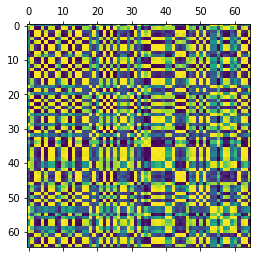

In [ ]:
plt.matshow(a)

In [ ]:
a[-1, :-1].argmax()

35

In [ ]:
Xx_train = X_train[:, 35][..., np.newaxis]
Xx_test = X_test[:, 35][..., np.newaxis]
Xx_train_scaled = X_train_scaled[:, 35][..., np.newaxis]
Xx_test_scaled = X_test_scaled[:, 35][..., np.newaxis]

In [ ]:
models = {
    'catboost_mae': cat.CatBoostRegressor(verbose=0, loss_function='MAE'),
    'catboost_rmse': cat.CatBoostRegressor(verbose=0),
    'xgboost': xgb.XGBRegressor(),
    'lightgbm': LGBMRegressor(),
    'random_forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor(),
    'dec_tree_mae': DecisionTreeRegressor(criterion='absolute_error'),
    'dec_tree': DecisionTreeRegressor(),
    'linreg': LinearRegression()
    #'svm_rbf': SVR(kernel='rbf', degree=3),
    #'svm_linear': SVR(kernel='linear', degree=3),
    #'svm_sigmoid': SVR(kernel='sigmoid', degree=3),
    #'svm_poly3': SVR(kernel='poly', degree=3),
    #'svm_poly6': SVR(kernel='poly', degree=6),
    #'svm_poly9': SVR(kernel='poly', degree=9),
    #'svm_poly12': SVR(kernel='poly', degree=12),
    #'svm_poly15': SVR(kernel='poly', degree=15),
}

kf = KFold(n_splits=5)

result, frames = test_models(models, Xx_train, y_train, Xx_test, Xx_train_scaled, Xx_test_scaled, kf, test_data, 'single')
print(result)
r = []
for i in result:
    a = result[i]
    r.append(a['val_acc'])

print(r)

catboost_mae


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Fold 1: train acc: 0.7078 train loss: 0.0244 val acc: 0.7290 val loss: 0.0232
Fold 2: train acc: 0.7071 train loss: 0.0238 val acc: 0.6695 val loss: 0.0261
Fold 3: train acc: 0.7067 train loss: 0.0229 val acc: 0.6880 val loss: 0.0308
Fold 4: train acc: 0.7101 train loss: 0.0236 val acc: 0.6981 val loss: 0.0222
Fold 5: train acc: 0.7042 train loss: 0.0249 val acc: 0.6863 val loss: 0.0230
Mean over folds: train acc: 0.7072 train loss: 0.0239 val acc: 0.6942 val loss: 0.0250
----------------------------------------------------------------------------------------------------------
catboost_mae_scaled
Fold 1: train acc: 0.7078 train loss: 0.0244 val acc: 0.7290 val loss: 0.0232
Fold 2: train acc: 0.7071 train loss: 0.0238 val acc: 0.6695 val loss: 0.0261
Fold 3: train acc: 0.7067 train loss: 0.0229 val acc: 0.6880 val loss: 0.0308
Fold 4: train acc: 0.7101 train loss: 0.0236 val acc: 0.6981 val loss: 0.0222
Fold 5: train acc: 0.7042 train loss: 0.0249 val acc: 0.6863 val loss: 0.0230
Mean o

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:195: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:195: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "


Fold 1: train acc: 0.6214 train loss: 0.0252 val acc: 0.6178 val loss: 0.0252
Fold 2: train acc: 0.6448 train loss: 0.0254 val acc: 0.6223 val loss: 0.0270
Fold 3: train acc: 0.6625 train loss: 0.0243 val acc: 0.6020 val loss: 0.0320
Fold 4: train acc: 0.6485 train loss: 0.0259 val acc: 0.6492 val loss: 0.0276
Fold 5: train acc: 0.6300 train loss: 0.0272 val acc: 0.5970 val loss: 0.0259
Mean over folds: train acc: 0.6414 train loss: 0.0256 val acc: 0.6177 val loss: 0.0275
----------------------------------------------------------------------------------------------------------
random_forest


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:195: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:195: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  warnings.warn("Usage of np.ndarray subset (sliced data) is not recommended "


Fold 1: train acc: 0.8575 train loss: 0.0101 val acc: 0.6684 val loss: 0.0274
Fold 2: train acc: 0.8521 train loss: 0.0101 val acc: 0.6577 val loss: 0.0268
Fold 3: train acc: 0.8601 train loss: 0.0093 val acc: 0.6594 val loss: 0.0296
Fold 4: train acc: 0.8529 train loss: 0.0095 val acc: 0.6610 val loss: 0.0294
Fold 5: train acc: 0.8441 train loss: 0.0101 val acc: 0.6762 val loss: 0.0254
Mean over folds: train acc: 0.8533 train loss: 0.0098 val acc: 0.6645 val loss: 0.0277
----------------------------------------------------------------------------------------------------------
random_forest_scaled
Fold 1: train acc: 0.8503 train loss: 0.0101 val acc: 0.6751 val loss: 0.0269
Fold 2: train acc: 0.8555 train loss: 0.0101 val acc: 0.6627 val loss: 0.0268
Fold 3: train acc: 0.8555 train loss: 0.0094 val acc: 0.6594 val loss: 0.0294
Fold 4: train acc: 0.8542 train loss: 0.0095 val acc: 0.6594 val loss: 0.0294
Fold 5: train acc: 0.8512 train loss: 0.0099 val acc: 0.6728 val loss: 0.0252
Mean 

## PCA + models

### Improtance

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=241)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
importances = importances*100

In [ ]:
for delim in np.linspace(0.25, 20, 80):
    num = np.array([1 if i > delim else 0 for i in importances]).sum()
    print("Num of features, which importence is over","%.2f" % delim, ":", num)

Num of features, which importence is over 0.25 : 3
Num of features, which importence is over 0.50 : 2
Num of features, which importence is over 0.75 : 2
Num of features, which importence is over 1.00 : 2
Num of features, which importence is over 1.25 : 2
Num of features, which importence is over 1.50 : 2
Num of features, which importence is over 1.75 : 2
Num of features, which importence is over 2.00 : 2
Num of features, which importence is over 2.25 : 2
Num of features, which importence is over 2.50 : 2
Num of features, which importence is over 2.75 : 2
Num of features, which importence is over 3.00 : 2
Num of features, which importence is over 3.25 : 2
Num of features, which importence is over 3.50 : 2
Num of features, which importence is over 3.75 : 2
Num of features, which importence is over 4.00 : 2
Num of features, which importence is over 4.25 : 2
Num of features, which importence is over 4.50 : 2
Num of features, which importence is over 4.75 : 2
Num of features, which importen

In [ ]:
print("Features that important at 0.25%:", np.arange(64)[importances > 0.25])
print("Features that important at 0.5%:", np.arange(64)[importances > 0.5])
print("Features that important at 0.75%:", np.arange(64)[importances > 0.75])
print("Features that important at 1.00%:", np.arange(64)[importances > 1.])

Features that important at 0.25%: [ 6 11 25]
Features that important at 0.5%: [ 6 25]
Features that important at 0.75%: [ 6 25]
Features that important at 1.00%: [ 6 25]


### PCA

In [ ]:
from sklearn.decomposition import PCA
results = []
for i in range(1, 64):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_compressed = pca.transform(X_train)
    results.append(pca.explained_variance_ratio_.sum())

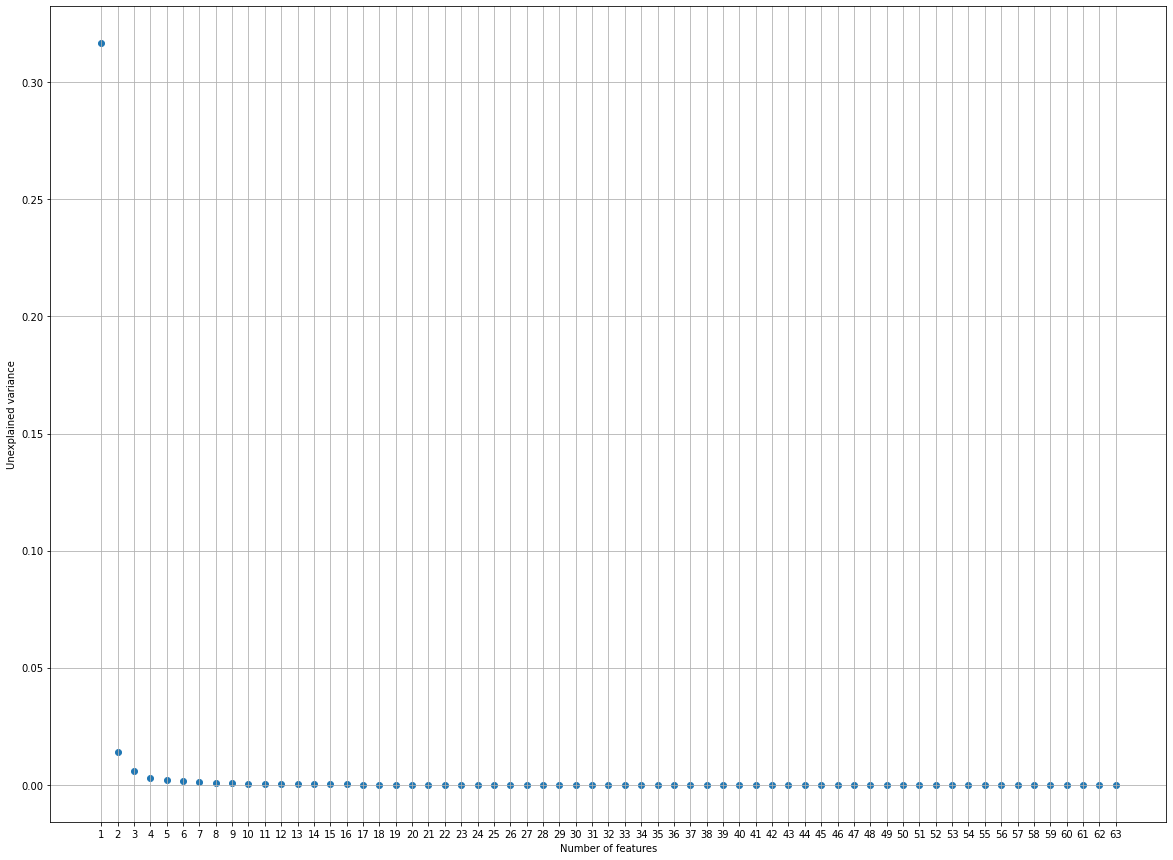

In [ ]:
plt.figure(figsize=(20, 15))
plt.scatter(x=range(1, 64), y = 1-np.array(results))
plt.xticks(np.arange(1, 64))
plt.xlabel('Number of features')
plt.ylabel('Unexplained variance')
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=32)
X_train_compressed = pca.fit_transform(X_train)
X_test_compressed = pca.transform(X_test)
X_train_scaled_compressed = pca.transform(X_train_scaled)
X_test_scaled_compressed = pca.transform(X_test_scaled)

In [ ]:
models = {
    'catboost_mae': cat.CatBoostRegressor(verbose=0, loss_function='MAE'),
    'catboost_rmse': cat.CatBoostRegressor(verbose=0),
    'xgboost': xgb.XGBRegressor(),
    'lightgbm': LGBMRegressor(),
    'random_forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor(),
    'dec_tree_mae': DecisionTreeRegressor(criterion='absolute_error'),
    'dec_tree': DecisionTreeRegressor(),
    'linreg': LinearRegression()
    #'svm_rbf': SVR(kernel='rbf', degree=3),
    #'svm_linear': SVR(kernel='linear', degree=3),
    #'svm_sigmoid': SVR(kernel='sigmoid', degree=3),
    #'svm_poly3': SVR(kernel='poly', degree=3),
    #'svm_poly6': SVR(kernel='poly', degree=6),
    #'svm_poly9': SVR(kernel='poly', degree=9),
    #'svm_poly12': SVR(kernel='poly', degree=12),
    #'svm_poly15': SVR(kernel='poly', degree=15),
}

kf = KFold(n_splits=5)

result, frames = test_models(models, X_train_compressed, y_train, X_test_compressed,
                             X_train_scaled_compressed, X_test_scaled_compressed, kf, test_data, 'pca18')
print(result)
r = []
for i in result:
    a = result[i]
    r.append(a['val_acc'])

print(np.max(r))

catboost_mae
Fold 1: train acc: 0.8575 train loss: 0.0094 val acc: 0.6953 val loss: 0.0178
Fold 2: train acc: 0.8517 train loss: 0.0100 val acc: 0.6341 val loss: 0.0222
Fold 3: train acc: 0.8626 train loss: 0.0094 val acc: 0.6509 val loss: 0.0214
Fold 4: train acc: 0.8496 train loss: 0.0099 val acc: 0.6880 val loss: 0.0194
Fold 5: train acc: 0.8635 train loss: 0.0093 val acc: 0.6981 val loss: 0.0178
Mean over folds: train acc: 0.8570 train loss: 0.0096 val acc: 0.6733 val loss: 0.0197
----------------------------------------------------------------------------------------------------------
catboost_mae_scaled
Fold 1: train acc: 0.8967 train loss: 0.0079 val acc: 0.8013 val loss: 0.0142
Fold 2: train acc: 0.8866 train loss: 0.0083 val acc: 0.7723 val loss: 0.0140
Fold 3: train acc: 0.9001 train loss: 0.0078 val acc: 0.7673 val loss: 0.0173
Fold 4: train acc: 0.8942 train loss: 0.0082 val acc: 0.7673 val loss: 0.0148
Fold 5: train acc: 0.8930 train loss: 0.0079 val acc: 0.7993 val loss: 

In [ ]:
# model on each feature and another model to choose model (attention)

# Best result

In [ ]:
#best stacking_rf_ns_p - 0.86186